In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

## Q1. 전국 시도별 약국수를 구해주세요!

* 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.

In [23]:
pharmacy = df[df["상권업종소분류명"] == "약국"]
pharmacy["시도명"].value_counts()

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

## Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

* 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!

In [24]:
vet = df[df["상권업종소분류명"] == "동물병원"]
vet["시도명"].value_counts()

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64

In [27]:
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Text(0.5, 1.0, '시도 별 동물병원 수')

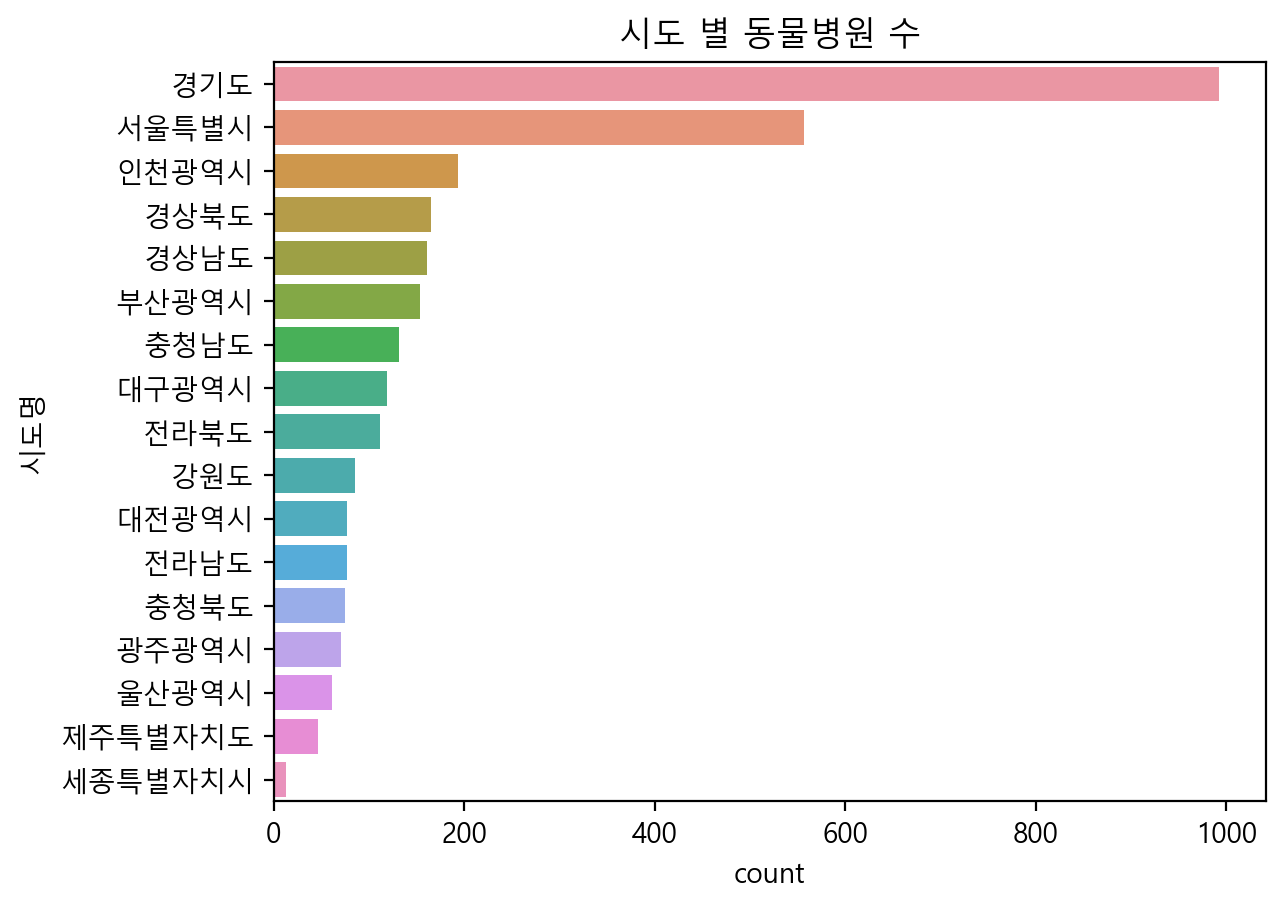

In [41]:
chart = sns.countplot(data = vet, y = "시도명", order=vet["시도명"].value_counts().index)
plt.title("시도 별 동물병원 수")

Text(0.5, 1.0, '시도 별 약국 수')

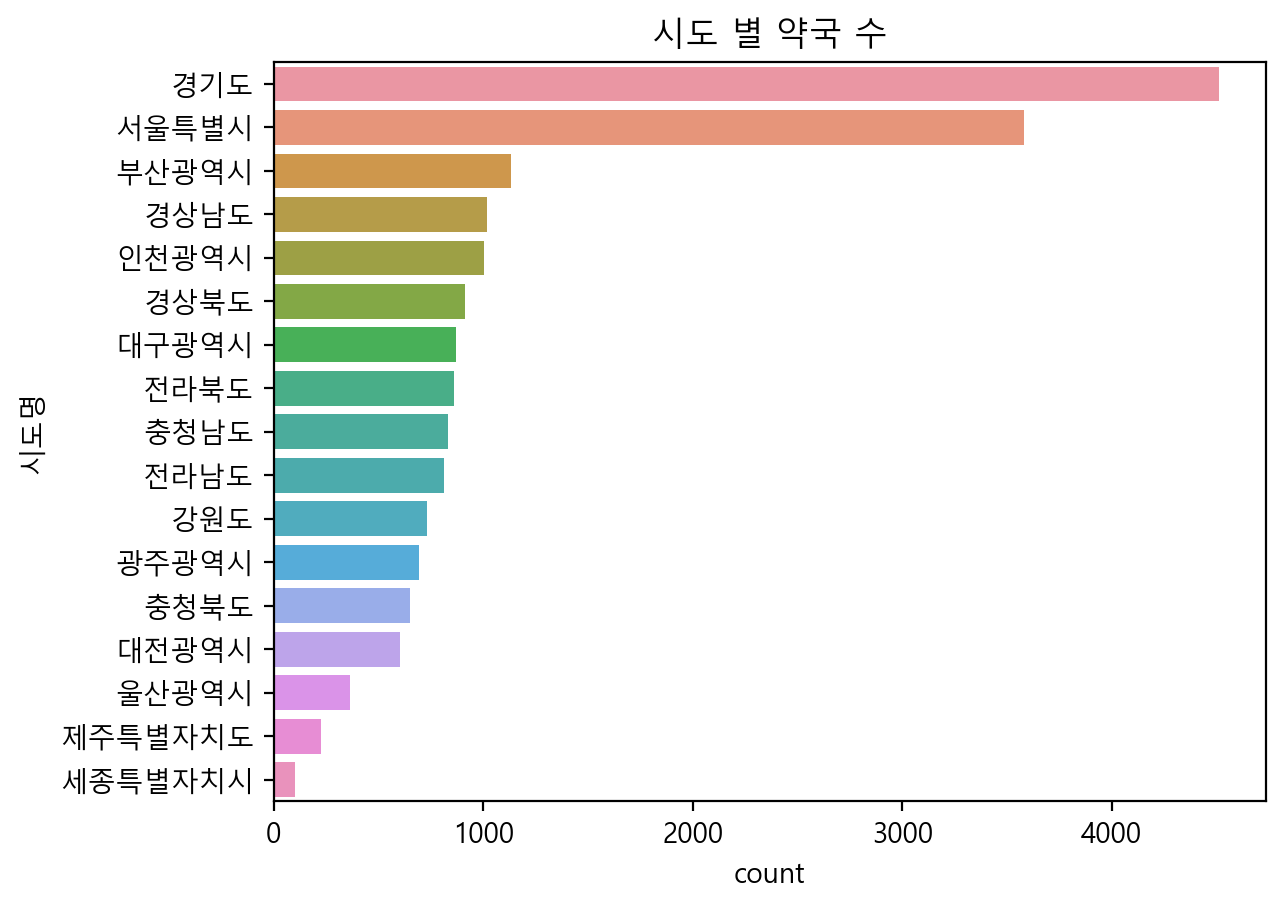

In [42]:
chart2 = sns.countplot(data = pharmacy, y = "시도명", order = pharmacy["시도명"].value_counts().index)
plt.title("시도 별 약국 수")

## Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

* 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
* 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
* 비율이 높은 순서대로 정렬되게 구해주세요!

In [61]:
seoul = df[(df["시도명"] == "서울특별시") & (df["상권업종중분류명"] == "병원")]
beauty = seoul[seoul["상권업종소분류명"].str.contains("피부|성형")]
ratio = round(beauty["시군구명"].value_counts() / seoul["시군구명"].value_counts(), 2)
ratio.sort_values(ascending = False)

강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
Name: 시군구명, dtype: float64

## Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

* folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
* 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
* folium 문서 : https://python-visualization.github.io/folium/quickstart.html

In [62]:
import folium

In [95]:
senior = df[df["상권업종소분류명"] == "노인/치매병원"]
lon = df["경도"].mean()
lat = df["위도"].mean()
map = folium.Map(location=(lat, lon), zoom_start=7)

In [97]:
for n in senior.index:
    name = senior.loc[n,'상호명']
    address = senior.loc[n, '도로명주소']
    popup = f"{name}-{address}"
    location = [senior.loc[n, '위도'], senior.loc[n, '경도']]
    folium.Marker(location = location,
                 popup = popup,
                 ).add_to(map)

In [98]:
map